In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import Bandit

In [2]:
class UCB:
    def __init__(self, n_arms=2):
        self.n_arms = n_arms
        self.reward_history = [[] for _ in range(n_arms)]
        self.t = 0
    
    def decide(self):
        for arm_id in range(self.n_arms):
            if len(self.reward_history[arm_id]) == 0:
                return arm_id
            
        conf_bounds = [
            np.mean(history) + np.sqrt(2 * np.log(self.t) / len(history)) 
            for history in self.reward_history
        ]
        
        return int(np.random.choice(
            np.argwhere(conf_bounds == np.max(conf_bounds)).flatten()
        ))
        
    def update(self, arm_id, reward):
        self.reward_history[arm_id].append(reward)
        self.t += 1

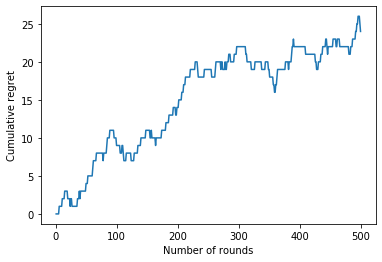

In [3]:
N_ARMS = 3

bandit = Bandit(
    optimal_arm_id=0,
    n_arms=3,
    reward_dists=[np.random.binomial for _ in range(N_ARMS)],
    reward_dists_params=[(1, 0.9), (1, 0.8), (1, 0.7)]
)

ucb_policy = UCB(n_arms=N_ARMS)

history, rewards, optimal_rewards = bandit.automate(
    ucb_policy, n_rounds=500, visualize_regret=True
)

In [4]:
print(*history)

0 1 2 1 0 2 0 1 1 0 1 0 2 0 2 0 0 1 0 1 0 1 0 1 2 0 1 0 1 0 0 1 0 1 0 1 0 0 0 2 2 1 1 0 1 0 1 0 1 0 1 1 1 2 2 2 2 0 2 0 2 0 1 1 1 1 1 0 0 0 0 0 2 2 0 0 1 0 1 0 0 0 0 0 1 0 2 2 2 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 2 2 2 2 0 1 0 1 1 0 1 0 0 0 0 0 0 2 2 2 2 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 2 2 2 0 0 0 1 1 1 0 0 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 2 2 0 0 1 1 0 0 0 0


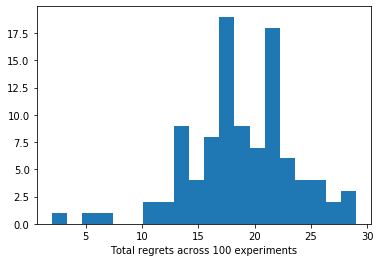

In [5]:
regrets = bandit.repeat(
    UCB, [N_ARMS], n_experiments=100, n_rounds=300, visualize_regret_dist=True
)

In [6]:
np.mean(regrets), np.max(regrets)

(18.78, 29)